In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import xml.etree.ElementTree as ET
import rasterio as rio
from rasterio.plot import show

EPSG:26916


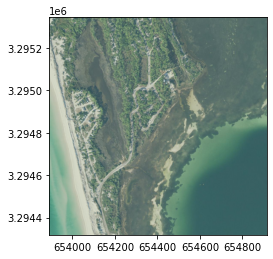

In [2]:
images_dir = 'C:/crs/src/dash_doodler/results/results2022-03-24-10-59/images/'
im_name = 'naip3_crs.jpg'

with rio.open(images_dir+im_name) as im:
    # this will also read georeferencing info from a file called im_name.aux.xml, if present.
    #print(im.read()) # order is (bands, rows, columns)
    print(im.crs)
    show(im.read(), transform=im.transform)

(1, 1024, 1024)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 3 3 3]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
EPSG:26916


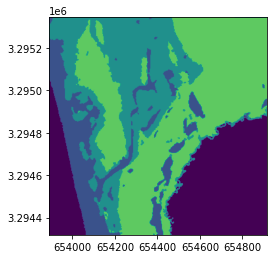

In [3]:
labels_dir = 'C:/crs/src/dash_doodler/results/results2022-03-24-10-59/labels/'
label_name = 'naip3_crs_label.jpg'

with rio.open(labels_dir+label_name) as im:
    # this will also read georeferencing info from a file called label_name.aux.xml, if present.
    # but, right now, those files are not written to the labels folder
    print(np.shape(im.read()))
    print(np.squeeze(im.read())) # order is (bands, rows, columns)
    print(im.crs)
    show(im.read(), transform=im.transform)
    

In [4]:
import xarray as xr
rio = xr.open_rasterio(labels_dir+label_name)
rio.to_netcdf('filename.nc')

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_21236\2715859419.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  rio = xr.open_rasterio(labels_dir+label_name)


In [5]:
import rioxarray
import os
labels_dir = 'C:/crs/src/dash_doodler/results/results2022-03-24-10-59/labels/'
label_name = 'naip3_crs_label.jpg'
nc_name = os.path.splitext(label_name)[0]+'.nc'

da = rioxarray.open_rasterio(labels_dir+label_name)
ds=da.to_dataset(name='class')
ds.to_netcdf(nc_name)
print(nc_name)

label_name = 'naip4_crs_label.jpg'
nc_name = os.path.splitext(label_name)[0]+'.nc'

da = rioxarray.open_rasterio(labels_dir+label_name)
ds=da.to_dataset(name='class')
ds.to_netcdf(nc_name)
print(nc_name)

naip3_crs_label.nc
naip4_crs_label.nc
